# Data Modeling 

In [7]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df_w_genres = pd.read_csv('~/Box/DSCI303/archive/data_w_genres.csv')
dfa = pd.read_csv('~/Box/DSCI303/archive/data_by_artist.csv')
dfy = pd.read_csv('~/Box/DSCI303/archive/data_by_year.csv')
dfg = pd.read_csv('~/Box/DSCI303/archive/data_by_genres.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              169909 non-null  int64  
 1   acousticness            169909 non-null  float64
 2   artists                 169909 non-null  object 
 3   danceability            169909 non-null  float64
 4   duration_ms             169909 non-null  int64  
 5   energy                  169909 non-null  float64
 6   explicit                169909 non-null  int64  
 7   id                      169909 non-null  object 
 8   instrumentalness        169909 non-null  float64
 9   key                     169909 non-null  int64  
 10  liveness                169909 non-null  float64
 11  loudness                169909 non-null  float64
 12  mode                    169909 non-null  int64  
 13  name                    169909 non-null  object 
 14  popularity          

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,release_date,speechiness,tempo,valence,year,year_bins,popularity_cut,popularity_cut_labels,popularity_qcut,popularity_qcut_labels
0,0,1.332319,['Carl Woitschach'],0.968662,158648,-1.097999,0,6KbQ3uYMLKb5jDxLF7wYDD,1.296562,10,...,1928,-0.289840,0.049500,0.940924,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
1,1,1.329664,"['Robert Schumann', 'Vladimir Horowitz']",-0.907636,282133,-1.776785,0,6KuQTIu1KoTTkLXKrwlLPV,2.389253,8,...,1928,-0.319186,-1.073199,-1.735454,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
2,2,0.294154,['Seweryn Goszczyński'],1.202486,104300,-1.004503,0,6L63VW0PibdM1HDSBoqnoM,-0.523513,5,...,1928,5.568626,-0.317996,1.325822,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
3,3,1.332319,['Francisco Canaro'],1.384983,180760,-1.341091,0,6M94FkXd15sOAOQYRnWPN8,2.343994,1,...,1928-09-25,-0.009722,-0.291114,0.716082,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
4,4,1.319044,"['Frédéric Chopin', 'Vladimir Horowitz']",-1.871449,687733,-1.064341,0,6N6tiFZ9vLTSOIxkj8qKrd,2.411883,11,...,1928,-0.344530,-1.783425,-1.763655,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"


## Clustering 
We are clustering on all numeric features except popularity and year.

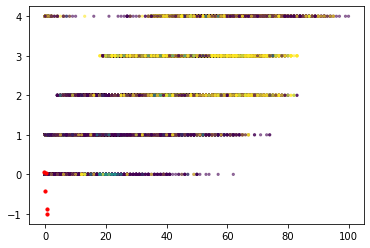

In [4]:
# K-means 
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
        'liveness', 'loudness','mode','speechiness','tempo','valence']
df_kmeans = df[features]
n_samples = df_kmeans.shape[0]
n_features = len(features)

labels = df['year_bins']

kmeans = KMeans(n_clusters=5).fit(df_kmeans)
centroids = kmeans.cluster_centers_
# print(centroids)

# TODO: show results
plt.scatter(df['popularity'], df['year_bins'], c= kmeans.labels_.astype(float), s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
plt.show()

#Evalute the results by comparing to labels. 


In [ ]:
#t-SNE


In [8]:
#random forest
from sklearn.ensemble import RandomForestClassifier

df_training = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train.csv')
df1 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
df1.head(5)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo
0,-1.079092,-0.958964,1.411452,-0.523513,1.321973,-0.371208,1.469008
1,-1.308627,-1.369582,1.796658,-0.523431,0.892274,0.366436,-1.272015
2,-0.890045,-1.261224,0.308191,-0.523503,0.653159,-0.438569,1.499926
3,0.421601,0.404062,-0.361246,-0.523480,-0.116065,-0.422562,-0.176524
4,1.303113,0.147425,-1.288733,-0.496325,-0.828996,-0.038401,1.920470


In [9]:
training_x = df1
training_y = df_training['popularity_cut']

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
test_x = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
test_y = df_test['popularity_cut']

training = RandomForestClassifier(oob_score = True)
training.fit(training_x, training_y)
print(training.score(test_x, test_y))
print(training.oob_score_)

0.649814607733506
0.6415856864463307


In [7]:
results = training.predict(test_x)
comparison = test_y.to_frame()
comparison['testing_results'] = results
comparison['validation'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)

wrong = sum(comparison.validation)
print("Percent accurate: ", 1-wrong/len(comparison))
comparison

Percent accurate:  0.6509328468012477


,popularity_cut,testing_results,validation
0,0,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,1,0
6,1,1,0
7,1,1,0
8,1,1,0
9,0,0,0


In [22]:
year_training_x = df_training.drop(['Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
year_training_y = df_training['year_bins']

year_test_x = df_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
year_test_y = df_test['year_bins']

training1 = RandomForestClassifier(oob_score = True)
training1.fit(year_training_x, year_training_y)
print(training1.score(year_test_x, year_test_y))

C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6748278500382555


C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [26]:
year_results = training1.predict(test_x)
comparison2 = year_test_y.to_frame()
comparison2['testing_results'] = year_results
comparison2['validation'] = comparison2.apply(lambda x: 1 if x.year_bins != x.testing_results else 0, axis=1)

wrong = sum(comparison2.validation)
print("Percent accurate: ", 1-wrong/len(comparison2))
comparison2

Percent accurate:  0.6748278500382556


,year_bins,testing_results,validation
0,0,0,0
1,1,2,1
2,1,1,0
3,1,1,0
4,2,1,1
5,1,2,1
6,2,2,0
7,2,2,0
8,3,2,1
9,1,0,1


In [36]:
#Multivariate regression for popularity score
from sklearn import linear_model

#training
regr = linear_model.LinearRegression()
training_x = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
new_training_y = df_training['popularity']
regr.fit(training_x, new_training_y)

#test results
test_x = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
results1 = regr.predict(test_x)

#cleaning it up
new_test_y = df_test['popularity']
comparison1 = new_test_y.to_frame()
comparison1['Regression_results'] = results1

#comparison
comparison1['Difference'] = abs(comparison1['popularity'] - comparison1['Regression_results'])
print("Average Difference of Prediction and Actual: ", comparison1['Difference'].mean())
print("Regression Score: ", regr.score(test_x, new_test_y))
comparison1

Average Difference of Prediction and Actual:  7.706713167172854
Regression Score:  0.7857951276957169


,popularity,Regression_results,Difference
0,0,6.569911,6.569911
1,24,20.740659,3.259341
2,0,6.810408,6.810408
3,0,7.473087,7.473087
4,16,20.427598,4.427598
5,45,19.515324,25.484676
6,27,32.846701,5.846701
7,28,36.346961,8.346961
8,31,37.481885,6.481885
9,0,12.020166,12.020166


In [32]:
#Multivariate regression for year
#training
regr1 = linear_model.LinearRegression()
new_training_y1 = df_training['year']
regr1.fit(year_training_x, new_training_y1)

#test results
results2 = regr1.predict(test_x)

#cleaning it up
new_test_y = df_test['year']
comparison3 = new_test_y.to_frame()
comparison3['Regression_results'] = results2

#comparison
comparison3['Difference'] = abs(comparison3['year'] - comparison3['Regression_results'])
print("Average Difference of Prediction and Actual: ", comparison3['Difference'].mean())
print("Regression score: ", regr1.score(test_x, new_test_y))
comparison3

Average Difference of Prediction and Actual:  8.734197995677883
Regression score:  0.8063778277617354


,year,Regression_results,Difference
0,1939,1952.374293,13.374293
1,1960,1964.272911,4.272911
2,1948,1943.005671,4.994329
3,1947,1942.061118,4.938882
4,1962,1958.102440,3.897560
5,1960,1985.408613,25.408613
6,1976,1975.974529,0.025471
7,1980,1973.073065,6.926935
8,1981,1981.132347,0.132347
9,1949,1944.383106,4.616894


In [61]:
#multiclass logistic regression 
from sklearn.linear_model import LogisticRegression

logi_train_x = df_training.drop(['year','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
logi_train_y = df_training['year_bins']
X = logi_train_x 
y = logi_train_y
clf = LogisticRegression(random_state=0).fit(X, y)

x2 = df_test.drop(['year','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
y2 = df_test['year_bins']

clf.score(x2, y2)

C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4790183038078983